#####Neural network for image classification using Colour Feature Extractor

In [1]:
import cv2
import numpy as np
import os
import zipfile
#import cv2_imshow
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

In [3]:
path = 'Computer_Vision_Masterclass_files\Datasets\homer_bart_1.zip'
zip_object = zipfile.ZipFile(file = path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

In [6]:
directory = 'homer_bart_1'


###Feature extraction


In [7]:
files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
print(files)

['homer_bart_1\\.DS_Store', 'homer_bart_1\\bart1.bmp', 'homer_bart_1\\bart10.bmp', 'homer_bart_1\\bart100.bmp', 'homer_bart_1\\bart101.bmp', 'homer_bart_1\\bart102.bmp', 'homer_bart_1\\bart103.bmp', 'homer_bart_1\\bart104.bmp', 'homer_bart_1\\bart105.bmp', 'homer_bart_1\\bart106.bmp', 'homer_bart_1\\bart108.bmp', 'homer_bart_1\\bart109.bmp', 'homer_bart_1\\bart11.bmp', 'homer_bart_1\\bart110.bmp', 'homer_bart_1\\bart111.bmp', 'homer_bart_1\\bart112.bmp', 'homer_bart_1\\bart113.bmp', 'homer_bart_1\\bart114.bmp', 'homer_bart_1\\bart115.bmp', 'homer_bart_1\\bart116.bmp', 'homer_bart_1\\bart117.bmp', 'homer_bart_1\\bart118.bmp', 'homer_bart_1\\bart119.bmp', 'homer_bart_1\\bart12.bmp', 'homer_bart_1\\bart120.bmp', 'homer_bart_1\\bart121.bmp', 'homer_bart_1\\bart122.bmp', 'homer_bart_1\\bart123.bmp', 'homer_bart_1\\bart124.bmp', 'homer_bart_1\\bart125.bmp', 'homer_bart_1\\bart126.bmp', 'homer_bart_1\\bart127.bmp', 'homer_bart_1\\bart128.bmp', 'homer_bart_1\\bart13.bmp', 'homer_bart_1\\bart13

In [8]:
export = 'mouth,pants,shoes,tshirt,shorts,sneakers,class\n'

In [9]:
show_images = False
features = []

In [10]:
100 * 200

20000

In [11]:
(2000 / 20000) * 100

10.0

In [12]:
100 / 2

50.0

In [13]:
for image_path in files:
  #print(image_path)
  try:
    original_image = cv2.imread(image_path)
    (H, W) = original_image.shape[:2]
  except:
    continue

  image = original_image.copy()
  image_features = []
  mouth = pants = shoes = 0
  tshirt = shorts = sneakers = 0

  image_name = os.path.basename(os.path.normpath(image_path))

  if image_name.startswith('b'):
    class_name = 0
  else:
    class_name = 1

  for height in range(0, H):
    for width in range(0, W):
      blue = image.item(height, width, 0)
      green = image.item(height, width, 1)
      red = image.item(height, width, 2)

      # Homer - brown mouth
      if (blue >= 95 and blue <= 140 and green >= 160 and green <= 185 and red >= 175 and red <= 200):
        image[height, width] = [0, 255, 255]
        mouth += 1

      # Homer - blue pants
      if (blue >= 150 and blue <= 180 and green >= 98 and green <= 120 and red >= 0 and red <= 90):
        image[height, width] = [0, 255, 255]
        pants += 1

      # Homer - gray shoes
      if height > (H / 2):
        if (blue >= 25 and blue <= 45 and green >= 25 and green <= 45 and red >= 25 and red <= 45):
          image[height, width] = [0, 255, 255]
          shoes += 1

      # Bart - orange t-shirt
      if (blue >= 11 and blue <= 22 and green >= 85 and green <= 105 and red >= 240 and red <= 255):
        image[height, width] = [0, 255, 128]
        tshirt += 1

      # Bart - blue shorts
      if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
        image[height, width] = [0, 255, 128]
        shorts += 1

      # Bart - blue sneakers
      if height > (H / 2):
        if (blue >= 125 and blue <= 170 and green >= 0 and green <= 12 and red >= 0 and red <= 20):
          image[height, width] = [0, 255, 128]
          sneakers += 1

  mouth = round((mouth / (H * W)) * 100, 9)
  pants = round((pants / (H * W)) * 100, 9)
  shoes = round((shoes / (H * W)) * 100, 9)

  tshirt = round((tshirt / (H * W)) * 100, 9)
  shorts = round((shorts / (H * W)) * 100, 9)
  sneakers = round((sneakers / (H * W)) * 100, 9)

  image_features.append(mouth)
  image_features.append(pants)
  image_features.append(shoes)
  image_features.append(tshirt)
  image_features.append(shorts)
  image_features.append(sneakers)
  image_features.append(class_name)

  features.append(image_features)

  #print('Homer mouth: %s - Homer pants: %s - Homer shoes: %s' % (image_features[0], image_features[1], image_features[2]))
  #print('Bart t-shirt: %s - Bart shorts: %s - Bart sneakers: %s' % (image_features[3], image_features[4], image_features[5]))

  f = (",".join([str(item) for item in image_features]))
  export += f + '\n'
  
  

  if show_images == True:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    fig, im = plt.subplots(1, 2)
    im[0].axis('off')
    #im[0].imshow(original_image)
    im[1].axis('off')
    #im[1].imshow(image)
    plt.show()

In [14]:
export

'mouth,pants,shoes,tshirt,shorts,sneakers,class\n0.0,0.0,0.114799225,6.886101887,3.495204355,3.495204355,0\n0.0,0.0,0.11007847,5.004901113,3.183888705,3.183888705,0\n0.0,0.0,0.182518631,5.264620437,5.029682961,5.029682961,0\n0.0,0.480168257,0.080028043,0.0,0.0,0.0,0\n0.0,0.0,0.029707562,8.978929368,3.459119497,3.459119497,0\n0.0,0.0,0.053304904,6.75432362,0.948827292,0.948827292,0\n0.249585206,0.0,0.019853369,9.693407263,4.104683977,4.104683977,0\n0.0,0.0,0.181208054,0.0,0.0,0.0,0\n0.0,0.0,0.148868778,0.0,0.0,0.0,0\n0.0,0.0,0.114762211,9.594752524,7.522715548,7.522715548,0\n0.0,0.0,0.138655462,0.0,0.0,0.0,0\n0.0,0.0,0.02400947,19.545383481,0.0,0.0,0\n0.00307645,0.0,0.0,6.495154592,5.599138594,5.599138594,0\n0.001317263,0.0,0.087817515,0.0,0.0,0.0,0\n0.0,0.0,0.032184591,8.395721925,0.0,0.0,0\n0.02105732,0.0,0.008503918,8.915750471,0.0,0.0,0\n0.0,0.0,0.081055114,11.095816228,4.525111363,4.525111363,0\n0.0,0.0,0.08757526,10.443349754,3.183296307,3.183296307,0\n0.0,0.0,0.043806812,9.497408

In [15]:
with open('features.csv', 'w') as file:
  for l in export:
    file.write(l)
file.closed

True

In [16]:
dataset = pd.read_csv('features.csv')
dataset

,mouth,pants,shoes,tshirt,shorts,sneakers,class
0,0.000000,0.000000,0.114799,6.886102,3.495204,3.495204,0
1,0.000000,0.000000,0.110078,5.004901,3.183889,3.183889,0
2,0.000000,0.000000,0.182519,5.264620,5.029683,5.029683,0
3,0.000000,0.480168,0.080028,0.000000,0.000000,0.000000,0
4,0.000000,0.000000,0.029708,8.978929,3.459119,3.459119,0
...,...,...,...,...,...,...,...
264,6.485412,0.000000,0.171985,0.000000,0.000000,0.000000,1
265,0.000000,0.000000,0.161637,0.000000,0.000000,0.000000,1
266,4.264975,0.000000,0.329940,0.000000,0.000000,0.000000,1
267,1.429133,0.000000,0.034559,0.000000,0.000000,0.000000,1


##Train and test sets

In [17]:
X = dataset.iloc[:, 0:6].values
X

array([[ 0.        ,  0.        ,  0.11479923,  6.88610189,  3.49520435,
         3.49520435],
       [ 0.        ,  0.        ,  0.11007847,  5.00490111,  3.18388871,
         3.18388871],
       [ 0.        ,  0.        ,  0.18251863,  5.26462044,  5.02968296,
         5.02968296],
       ...,
       [ 4.26497522,  0.        ,  0.32993967,  0.        ,  0.        ,
         0.        ],
       [ 1.42913348,  0.        ,  0.03455866,  0.        ,  0.        ,
         0.        ],
       [ 0.853902  , 13.74424774,  0.16177802,  0.        ,  0.        ,
         0.        ]])

In [62]:
len(X)

269

In [18]:
y = dataset.iloc[:, 6].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [63]:
len(y)

269

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [20]:
X_train.shape, y_train.shape

((215, 6), (215,))

In [21]:
X_test.shape, y_test.shape

((54, 6), (54,))

##Building and training the neural network

In [22]:
(6 + 2) / 2

4.0

In [23]:
# 6 -> 4 -> 4 -> 4 -> 1
network2 = tf.keras.models.Sequential()
network2.add(tf.keras.layers.Dense(input_shape = (6,), units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units = 4, activation='relu'))
network2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [24]:
network2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
network2.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [26]:
history = network2.fit(X_train, y_train, epochs = 50)

Epoch 1/50


7/7 [==============================] - 1s 3ms/step - loss: 0.6663 - accuracy: 0.6140
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.6140
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6497 - accuracy: 0.6140
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6405 - accuracy: 0.6140
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6314 - accuracy: 0.6140
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.6140
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6120 - accuracy: 0.6140
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.6013 - accuracy: 0.6140
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5913 - accuracy: 0.6140
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5805 - accuracy: 0.6140
Epoch 11/50
7/7 [====================

##Evaluating the neural network

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

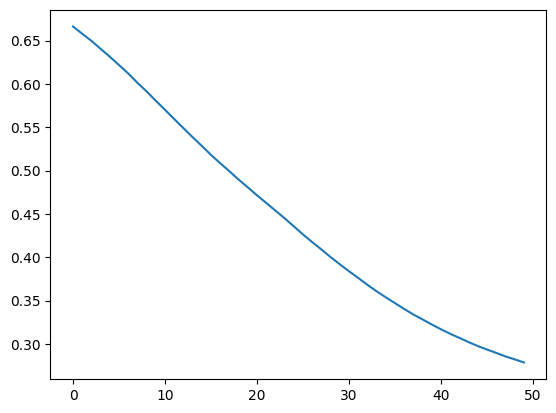

In [28]:
plt.plot(history.history['loss']);

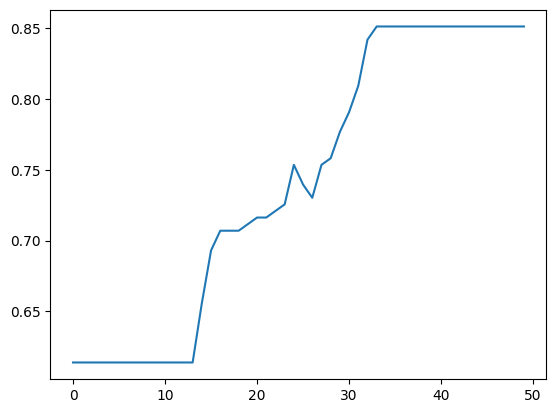

In [29]:
plt.plot(history.history['accuracy']);

In [30]:
X_test.shape

(54, 6)

In [31]:
predictions = network2.predict(X_test)
predictions

2/2 [==============================] - 0s 7ms/step


array([[2.23032874e-03],
       [8.76815438e-01],
       [1.65990993e-01],
       [5.61145663e-01],
       [1.17568567e-01],
       [9.03551698e-01],
       [1.97224887e-04],
       [1.03923872e-01],
       [4.58475985e-02],
       [5.73572889e-02],
       [2.68276870e-01],
       [9.95572984e-01],
       [6.66575372e-01],
       [2.59737275e-03],
       [5.61104655e-01],
       [9.92805183e-01],
       [5.97755849e-01],
       [9.45786178e-01],
       [5.57285428e-01],
       [1.92021042e-01],
       [3.30454859e-05],
       [9.72424507e-01],
       [7.49697685e-01],
       [1.34126293e-02],
       [5.48654934e-04],
       [9.84336257e-01],
       [5.69806576e-01],
       [9.70031023e-02],
       [8.85103047e-01],
       [9.94764745e-01],
       [7.37655818e-01],
       [9.99713719e-01],
       [9.89001989e-01],
       [5.78295290e-01],
       [9.99000132e-01],
       [7.41105437e-01],
       [5.28074875e-02],
       [5.80583662e-02],
       [5.61123013e-01],
       [1.85354799e-01],


In [32]:
predictions = (predictions > 0.5)
predictions

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True]])

In [33]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions) # 0.68

0.8888888888888888

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[22,  6],
       [ 0, 26]], dtype=int64)

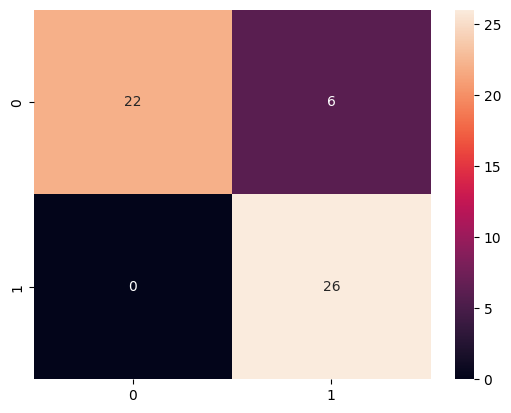

In [36]:
sns.heatmap(cm, annot=True);

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        28
           1       0.81      1.00      0.90        26

    accuracy                           0.89        54
   macro avg       0.91      0.89      0.89        54
weighted avg       0.91      0.89      0.89        54



##Saving, loading and classifying one single image

In [38]:
model_json = network2.to_json()
with open('network2.json','w') as json_file:
  json_file.write(model_json)

In [39]:
from keras.models import save_model
network2_saved = save_model(network2, 'weights2.hdf5')

C:\Users\User\AppData\Local\Temp\ipykernel_21880\3691553161.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  network2_saved = save_model(network2, 'weights2.hdf5')


In [40]:
with open('network2.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_input_shape": [null, 6], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 6], "units": 4, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 6]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"

In [41]:
network2_loaded = tf.keras.models.model_from_json(json_saved_model)
network2_loaded.load_weights('weights2.hdf5')
network2_loaded.compile(loss = 'binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [42]:
network2_loaded.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [64]:
test_image = X_test[33]
test_image

array([0.        , 0.15504173, 0.140367  , 0.        , 0.        ,
       0.        ])

In [65]:
test_image.shape

(6,)

In [66]:
test_image = test_image.reshape(1,-1)
test_image.shape

(1, 6)

In [67]:
network2_loaded.predict(test_image)[0][0]

1/1 [==============================] - 0s 47ms/step


0.5782953

In [68]:
if network2_loaded.predict(test_image)[0][0] < 0.5:
  print('Bart')
else:
  print('Homer')

1/1 [==============================] - 0s 112ms/step
Homer
